In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random as rd
from math import *

In [9]:
mean1=1
mean2=5
mean3=10
data1=[]
data2=[]
data3=[]
for i in range(100):
    data1.append(mean1+np.random.normal(0,1))
    data2.append(mean2+np.random.normal(0,1.5))
    data3.append(mean3+np.random.normal(0,2))

In [10]:
def mean(data):
    return sum(data)/len(data)
def sd(data):
    sums=[]
    means=mean(data)
    for i in range(len(data)):
        sums.append(pow(data[i]-means,2))
    return sum(sums)/(len(data)-1)

In [37]:
M=[mean(data1),mean(data2),mean(data3)];
sd1=np.cov(data1);sd2=np.cov(data2);sd3=np.cov(data3)
sds=[sd1,sd2,sd3]
smean=(np.cov(data1)+np.cov(data2)+np.cov(data3))/3

In [25]:
data=[]
data.extend(data1)
data.extend(data2)
data.extend(data3)

In [38]:
def dffunc(data,M,rule):
    if rule==1:
        #단위 공분산
        clas=[]
        for i in range(len(data)):
            tmp=[]
            for j in range(len(M)):
                tmp.append(pow(data[i]-M[j],2))
            clas.append(tmp.index(min(tmp))+1)
        return clas
    if rule==2:
        #동일 공분산
        clas=[]
        for i in range(len(data)):
            tmp=[]
            for j in range(len(M)):
                x=(data[i]-M[j])/smean*(data[i]-M[j])
                tmp.append(x)
            clas.append(tmp.index(min(tmp))+1)
        return clas
        #일반적
        clas=[]
        for i in range(len(data)):
            tmp=[]
            for j in range(len(M)):
                x=(data[i]-M[j])/smean*(data[i]-M[j])+np.log(sds[j])
                tmp.append(x)
            clas.append(tmp.index(min(tmp))+1)
        return clas

In [39]:
clas=[]
for j in range(3):
    for i in range(100):
        if j==0:
            clas.append(1)
        elif j==1:
            clas.append(2)
        else:
            clas.append(3)

In [40]:
plt.scatter(data,clas,c=dffunc(data,M,2))

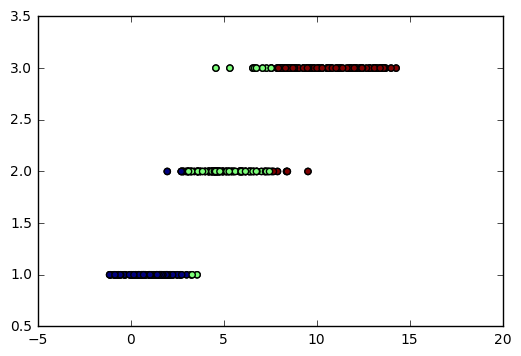

In [41]:
plt.show()